<a href="https://colab.research.google.com/github/Crisel8a/Probabilidad-1/blob/main/probafundamentosdc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center" style="color: #cd7f32;"> Fundamentos de Probabilidad en Python </h1>
@Crisel Escalante

- [Lanzando una moneda](#Lanzando-una-moneda)
- [Generando una semilla aleatoria](#Generando-una-semilla-aleatoria)
- [Funciones de masa y distribución](#Funciones-de-masa-y-distribución)
- [Esperanza, varianza y media aritmética](#Esperanza,-varianza-y-media-aritmética)
- [Distribuciones](#Distribuciones)



---

# <h2 align="center" style="color: #cd7f32;"> Cap. 1 Curso Data Camp </h2>



---



## Lanzando una moneda

In [ ]:
from scipy.stats import bernoulli

In [ ]:
bernoulli.rvs(p=0.5, size=1) #simulando una moneda como un evento bernoulli

array([1])

In [ ]:
bernoulli.rvs(p=0.5, size=10) #simulando 10 monedas

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

Suponiendo que 1 es cara y 0 es cruz, si queremos saber cuantas caras obtuvimos, entonces hacemos la suma

In [ ]:
sum(bernoulli.rvs(p=0.5, size=10))

7

In [ ]:
from scipy.stats import binom

In [ ]:
binom.rvs(n=10, p=0.5, size=1)

array([8])

In [ ]:
binom.rvs(n=10, p=0.5, size=10) #muchos lanzamientos

array([6, 5, 3, 3, 3, 7, 5, 6, 2, 8])





---


## Generando una semilla aleatoria

Usamos el parámetro ``` random_state ``` en la función ``` rvs() ```





In [ ]:
from scipy.stats import binom
binom.rvs(n=10, p=0.5, size=1, random_state=42)

array([4])

Luego, usamos ``` numpy.random.seed() ``` importando numpy



In [ ]:
import numpy as np
np.random.seed(42)

Vamos a lanzar 10 monedas justas con una semilla aleatoria

In [ ]:
from scipy.stats import binom
import numpy as np


np.random.seed(42)
binom.rvs(n=10, p=0.5, size=1)

array([4])

---

## Funciones de masa y distribución

Funciones de probabilidad $f(x)=P(X = x)$
- Las funciones de **masa** son para variables aleatorias **discreta**. 
- Las funciones de **densidad** son para variables aleatorias **continuas**. 

La función de distribución $F(x)=P(X \leq x)$


Probability mass function (pmf)
$$binomial.pmf(k,n,p) = {n \choose k}p^k (1-p)^{n-k}$$

En python ``` binom.pmf(k, n, p) ```



In [ ]:
#Probabilidad de obtener dos caras luego de 10 lanzamientos de una moneda justa
binom.pmf(k=2, n=10, p=0.5)

0.04394531250000004

In [ ]:
# Probabilidad de obtener 5 caras luego de 10 lanzamientos de una moneda justa
binom.pmf(k=5, n=10, p=0.5)

0.24609375000000003

In [ ]:
# Probabilidad de obtener 50 caras luego de 100 lanzamientos con probabilidad 0.3
binom.pmf(k=50, n=100, p=0.3)

1.302622713144528e-05

In [ ]:
#Probabilidad de obtener 65 caras luego de 100 lanzamientos con probabilidad 0.7
binom.pmf(k=65, n=100, p=0.7)

0.04677968235272997

Probability ditribution function (cdf)

$$binom.cdf(k, n, p) = {n \choose 0}p^0(1-p)^n + {n \choose 1}p(1-p)^{n-1} + \cdots + {n \choose k}p^k(1-p)^{n-k}$$

En python ``` binom.cdf(k, n, p) ```



In [ ]:
# Probabilidad de obtener 5 caras o menos en 10 lanzamientos de una moneda justa
binom.cdf(k=5, n=10, p=0.5)

0.623046875

In [ ]:
#Probabilidad de obtener 50 caras o menos en 100 lanzamientos con probabilidad 0.3
binom.cdf(k=50, n=100, p=0.3)

0.9999909653138043

Tenemos que $P(X > k) = 1 - P(X \leq k)$, entonces

In [ ]:
#Probabilidad de obtener más de 59 caras luego de 100 lanzamientos con probabilidad 0.7
1-binom.cdf(k=59, n=100, p=0.7)

0.9875015928335618

Otra opción es usar ``` .sf ``` luego de `binom`



In [ ]:
#Probabilidad de obtener más de 59 caras luego de 100 lanzamientos con probabilidad 0.7
binom.sf(k=59, n=100, p=0.7)

0.9875015928335618



---



## Esperanza, varianza y media aritmética

**Esperanza**: suma de los posibles valores según su probabilidad.
$$E(X)= \sum_{i=1}^k x_ip_i=x_1p_p+x_2p_2+ \cdots + x_kp_k$$

En nuestro caso, para lanzar una moneda obtenermos 
$$E(X)= \sum_{i=1}^2 x_ip_i=x_1p_p+x_2p_2 = 0(1-p) + 1 \cdot p = p$$

**Media Aritmética**: Cada $x_i$ es el resultado de un experiemnto, como lanzar una moneda (puede ser 0 o 1). 

$$ \overline{X} = \frac{1}{n} \sum_{i=1}^n x_i = \frac{1}{n} (x_1+x_2+ \cdots + x_n)$$

En python usamos la función `scipy.stats.describe()` para obtener la media aritmética con `.mean`:

In [ ]:
from scipy.stats import describe
describe([0,1]).mean

0.5

**Varianza**: Es una medida de dispersión. Es el valor esperado de la desviasión al cuadrado de ese vlor esperado. 

$$Var(X) = E[(X-E(X))^2]=\sum_{i=1}^n p_i(x_i-E(X))^2$$

En python usamos la función `scipy.stats.describe()` para obtener la media aritmética con `.variance`:

In [ ]:
describe([0,1]).variance

0.5



---

## Distribuciones

**Distribución Binomial**
En python usamos el método `binom.stats()` para conocer la esperanza y la varianza de esta distribución.

¿cuál es la esperanza y varianza para 10 lanzamientos de una moneda justa?

In [ ]:
binom.stats(n=10, p=0.5)

(array(5.), array(2.5))

¿cuál es la esperanza y varianza para el experimento de lanzar una moneda?

In [ ]:
binom.stats(n=1, p=0.5)

(array(0.5), array(0.25))

¿cuál es el valor esperado y la varianza para una moneda injusta con probabilidad de éxito del $30\%$?

In [ ]:
binom.stats(n=1, p=0.3)

(array(0.3), array(0.21))



---

# <h2 align="center" style="color: #cd7f32;"> Cap. 2 Curso Data Camp </h2>

## Independencia



---

# <h2 align="center" style="color: #cd7f32;"> Cap. 3 Curso Data Camp </h2>

## Distribución Normal

### Muestreo Normal

In [ ]:
 # Import norm, matplotlib.pyplot, and seaborn
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Create the sample using norm.rvs()
sample = norm.rvs(loc=0, scale=1, size=10000, random_state=13)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


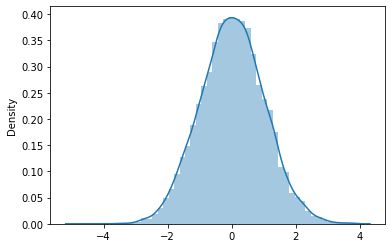

In [ ]:
# Plot the sample
sns.distplot(sample)
plt.show()

### Densidad de Probabilidad

In [ ]:
 # Import norm
from scipy.stats import norm

Función de densidad

In [ ]:
# Calculate the probability density
# with pdf
norm.pdf(-1, loc=0, scale=1)

0.24197072451914337

El parámetro `loc` especifica el promedio y el parametro `scale` especifica la desviación estandar.

In [ ]:
  # Calculate cumulative df of -1
norm.cdf(-1)

0.15865525393145707

In [ ]:
# Calculate cdf of 0.5
norm.cdf(0.5)

0.6914624612740131

In [ ]:
# Calculate ppf of 0.2
norm.ppf(0.2)

-0.8416212335729142

In [ ]:
# Calculate ppf of 55%
norm.ppf(0.55)

0.12566134685507416

In [ ]:
#Calculate cdf of value 0
norm.cdf(0)

0.5

In [ ]:
# Calculate ppf of probability 50%
norm.ppf(0.5)

0.0

In [ ]:
# Create our variables
a = -1
b=1
# Calculate the probability between 
# two values, subtracting 
norm.cdf(b) - norm.cdf(a)

0.6826894921370859

In [ ]:
# Create our variable
a=1
# Calculate the complement
# of cdf() using sf()
norm.sf(a)

0.15865525393145707

In [ ]:
# Create our variables
a = -2
b=2
# Calculate tail probability 
# by adding each tail 
norm.cdf(a) + norm.sf(b)

0.04550026389635839

In [ ]:
# Calculate tail probability
# by adding each tail
norm.cdf(a) + norm.sf(b)

0.04550026389635839

In [ ]:
# Create our variable
alpha = 0.95
# Calculate the interval
norm.interval(alpha)

(-1.959963984540054, 1.959963984540054)

## Distribución de Poisson

In [3]:
# Import poisson
from scipy.stats import poisson

Función probabilidad de masa

In [4]:
# Calculate the probability mass
# with pmf
poisson.pmf(k=3, mu=2.2)

0.19663867170702193

El parámetro `mu` especifica el promedio de eventos éxitosos 

In [5]:
# Calculate pmf of 0
poisson.pmf(k=0, mu=2.2)

0.11080315836233387

In [6]:
# Calculate pmf of 6
poisson.pmf(k=6, mu=2.2)

0.01744840480280308

### Generando el muestreo

In [7]:
# Import poisson, matplotlib.pyplot, and seaborn
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Create the sample using poisson.rvs()
sample = poisson.rvs(mu=2.2, size=10000, random_state=13)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


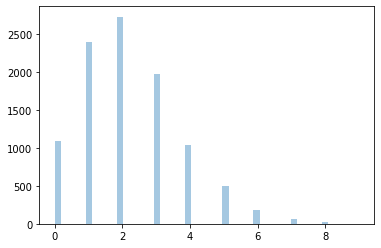

In [9]:
# Plot the sample
sns.distplot(sample, kde=False)
plt.show()

## Distribucion Geométrica

In [1]:
 # Import geom
from scipy.stats import geom

Función probabilidad de masa

In [2]:
# Calculate the probability mass
# with pmf
geom.pmf(k=30, p=0.0333)

0.012471080216374412

el parámetro $p$ indica la probabilidad de éxito. 

In [10]:
# Calculate cumulative distribution function of 4
geom.cdf(k=4, p=0.3)

0.7599

In [11]:
# Calculate survuval funtion of 2
geom.sf(k=2, p=0.3)

0.49000000000000005

In [12]:
# Calculate percent point function of 0.6
geom.ppf(q=0.6, p=0.3)

3.0

### Muestreo

In [4]:
# Import poisson, matplotlib.pyplot, and seaborn
from scipy.stats import geom
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
# Create the sample using geom.rvs()
sample = geom.rvs(p=0.3, size=10000, random_state=13)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


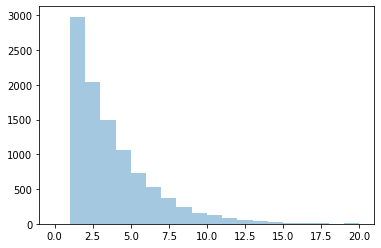

In [6]:
# Plot the sample
sns.distplot(sample, bins = np.linspace(0,20,21), kde=False)
plt.show()